In [1]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from itertools import combinations
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# 加载数据
file_path = 'd_cluster.xlsx'
normalized_data= pd.read_excel(file_path)

,Building,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,...,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,sheet_name
0,cleaned_11号楼_summed_by_date,1.200000,0.200000,0.200000,0.400000,0.000000,0.000000,0.800000,1.600000,2.200000,...,1.000000,2.000000,1.600000,2.600000,1.600000,1.800000,4.000000,5.200000,4.000000,2023_Month_2
1,cleaned_1号楼_summed_by_date,2.764706,1.000000,0.764706,0.352941,0.764706,0.058824,0.529412,2.117647,4.764706,...,3.529412,2.705882,2.588235,3.117647,3.529412,4.294118,4.764706,5.647059,5.294118,2023_Month_2
2,cleaned_20号楼_summed_by_date,1.916667,1.333333,1.000000,0.833333,1.166667,1.000000,3.916667,1.750000,3.333333,...,3.250000,3.000000,4.083333,3.000000,3.833333,3.500000,4.250000,5.250000,4.333333,2023_Month_2
3,cleaned_22号楼_summed_by_date,2.636364,2.272727,1.363636,1.545455,1.636364,1.363636,2.727273,3.545455,4.272727,...,5.000000,4.545455,4.000000,3.818182,4.454545,4.909091,5.636364,4.272727,6.454545,2023_Month_2
4,cleaned_3号楼_summed_by_date,1.800000,0.400000,0.500000,0.200000,0.400000,0.000000,0.400000,2.100000,2.000000,...,1.800000,1.600000,1.900000,1.400000,1.700000,1.900000,2.600000,2.800000,2.400000,2023_Month_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,cleaned_4号楼_summed_by_date,2.000000,1.000000,0.666667,0.666667,0.000000,1.000000,0.000000,1.333333,3.666667,...,2.000000,2.000000,2.333333,2.000000,2.333333,3.000000,3.666667,6.666667,3.666667,2024_Month_6
173,cleaned_5号楼_summed_by_date,2.000000,1.666667,0.333333,0.666667,0.000000,1.000000,0.000000,1.333333,3.333333,...,2.333333,2.333333,2.333333,2.666667,2.666667,4.000000,4.333333,7.333333,4.333333,2024_Month_6
174,cleaned_6号楼_summed_by_date,1.000000,0.666667,0.333333,0.333333,0.000000,0.000000,0.666667,1.666667,2.333333,...,2.666667,2.333333,2.000000,2.333333,2.666667,3.333333,3.333333,5.000000,2.666667,2024_Month_6
175,cleaned_8号楼_summed_by_date,1.333333,0.666667,0.333333,0.333333,0.333333,0.000000,0.333333,1.666667,2.333333,...,1.666667,2.000000,1.666667,1.666667,2.000000,2.666667,3.000000,5.666667,4.333333,2024_Month_6


In [ ]:
n_data=normalized_data.iloc[:,1:25]

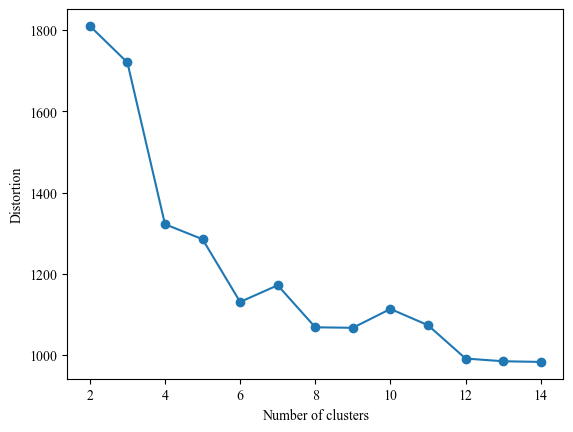

In [7]:
import numpy as np
import pandas as pd
from sklearn_extra.cluster import KMedoids
import tslearn.metrics as metrics
from tslearn.clustering import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# normalized_data = selected_month_data

# 计算Elbow图，寻找最佳聚类数
def test_elbow():
    distortions = []
    # 计算DTW距离矩阵
    # dists = metrics.cdist_dtw(normalized_data.iloc[:, 1:].values)  # 仅使用数值部分
    dists = metrics.cdist_soft_dtw_normalized(normalized_data.iloc[:, 1:25], gamma=0.5)  # 可选的软DTW
    for i in range(2, 15):
        km = KMedoids(n_clusters=i, random_state=42, metric="precomputed")
        km.fit(dists)
        distortions.append(km.inertia_)
    
    # 绘制Elbow图
    plt.plot(range(2, 15), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

test_elbow()

In [10]:
n_data=normalized_data.iloc[:, 1:25]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Data Shape:  (177, 26)
Cluster Prediction Shape:  (177,)
Silhouette Score:  0.19836922544704655


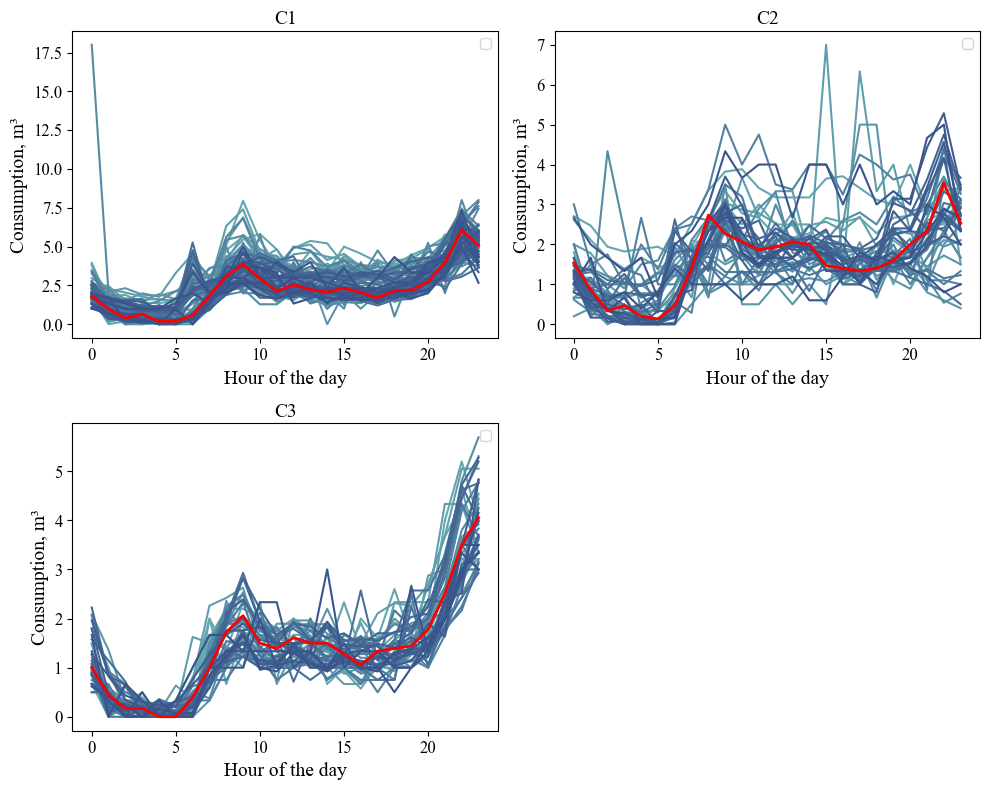

In [3]:
import numpy as np
import pandas as pd
import tslearn.metrics as metrics
from sklearn_extra.cluster import KMedoids
from tslearn.clustering import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.colors as mcolors

# Set the font globally to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

num_cluster = 3  # 假设选择4个聚类
km = KMedoids(n_clusters=num_cluster, random_state=0, metric="precomputed")

# 计算DTW距离矩阵
dists = metrics.cdist_soft_dtw_normalized(normalized_data.iloc[:, 1:25], gamma=0.5)  # 可选的软DTW

# 聚类并预测
y_pred = km.fit_predict(dists)

# 计算轮廓系数
np.fill_diagonal(dists, 0)  # 清除对角线，避免影响轮廓系数计算
score = silhouette_score(dists, y_pred, metric="precomputed")
print("Data Shape: ", normalized_data.shape)
print("Cluster Prediction Shape: ", y_pred.shape)
print("Silhouette Score: ", score)

# Create the gradient from blue_gray (#3C6990) to #3A548C and then to #BFCDDB
cmap = mcolors.LinearSegmentedColormap.from_list("blue_gradient", ["#64A7AF", "#3A548C"], N=10)

# 可视化每个聚类
plt.figure(figsize=(10, 8))  # 设置更大的图像尺寸

for yi in range(num_cluster):
    plt.subplot(2, 2, yi + 1)  # 创建2x2的子图布局
    # Create a gradient color based on the number of lines in the cluster
    num_lines = len(normalized_data.iloc[y_pred == yi, 1:25].values)
    for i, xx in enumerate(normalized_data.iloc[y_pred == yi, 1:25].values):  # 排除第一列
        color = cmap(i / num_lines)  # Use the colormap for a gradient effect
        plt.plot(xx.ravel(), color=color, alpha=1)  # 线条颜色为渐变

    # 绘制聚类中心
    plt.plot(normalized_data.iloc[km.medoid_indices_[yi], 1:25].values.ravel(), color="red", linewidth=2)  # 线条颜色为红色
    plt.text(0.5, 1.01, f'C{yi + 1}', transform=plt.gca().transAxes, fontsize=14, ha="center", va="bottom")  # 标签C1, C2放在图框上方
    plt.xlabel("Hour of the day", fontsize=14)  # 设置x轴字体大小
    plt.ylabel("Consumption, m³", fontsize=14)  # 设置y轴字体大小
    plt.legend()
    # Adjust the tick label sizes
    plt.tick_params(axis='both', labelsize=12)  # 增大横纵坐标刻度的字体大小


plt.tight_layout()
plt.show()


In [ ]:
n_data

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Data Shape:  (177, 26)
Cluster Prediction Shape:  (177,)
Silhouette Score:  0.3010906148011187


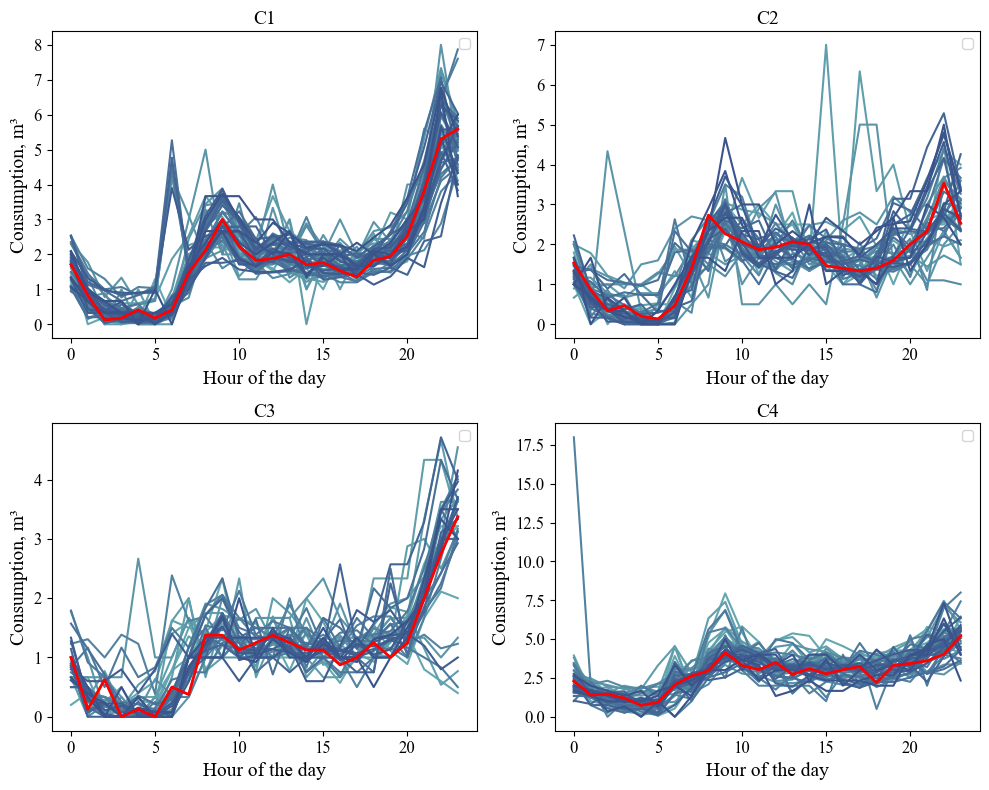

In [15]:
import numpy as np
import pandas as pd
import tslearn.metrics as metrics
from sklearn_extra.cluster import KMedoids
from tslearn.clustering import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.colors as mcolors

# Set the font globally to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

num_cluster = 4  # 假设选择4个聚类
km = KMedoids(n_clusters=num_cluster, random_state=0, metric="precomputed")

# 计算DTW距离矩阵
dists = metrics.cdist_soft_dtw_normalized(normalized_data.iloc[:, 1:25], gamma=0.5)  # 可选的软DTW

# 聚类并预测
y_pred = km.fit_predict(dists)

# 计算轮廓系数
np.fill_diagonal(dists, 0)  # 清除对角线，避免影响轮廓系数计算
score = silhouette_score(dists, y_pred, metric="precomputed")
print("Data Shape: ", normalized_data.shape)
print("Cluster Prediction Shape: ", y_pred.shape)
print("Silhouette Score: ", score)

# Create the gradient from blue_gray (#3C6990) to #3A548C and then to #BFCDDB
cmap = mcolors.LinearSegmentedColormap.from_list("blue_gradient", ["#64A7AF", "#3A548C"], N=10)

# 可视化每个聚类
plt.figure(figsize=(10, 8))  # 设置更大的图像尺寸

for yi in range(num_cluster):
    plt.subplot(2, 2, yi + 1)  # 创建2x2的子图布局
    # Create a gradient color based on the number of lines in the cluster
    num_lines = len(normalized_data.iloc[y_pred == yi, 1:25].values)
    for i, xx in enumerate(normalized_data.iloc[y_pred == yi, 1:25].values):  # 排除第一列
        color = cmap(i / num_lines)  # Use the colormap for a gradient effect
        plt.plot(xx.ravel(), color=color, alpha=1)  # 线条颜色为渐变

    # 绘制聚类中心
    plt.plot(normalized_data.iloc[km.medoid_indices_[yi], 1:25].values.ravel(), color="red", linewidth=2)  # 线条颜色为红色
    plt.text(0.5, 1.01, f'C{yi + 1}', transform=plt.gca().transAxes, fontsize=14, ha="center", va="bottom")  # 标签C1, C2放在图框上方
    plt.xlabel("Hour of the day", fontsize=14)  # 设置x轴字体大小
    plt.ylabel("Consumption, m³", fontsize=14)  # 设置y轴字体大小
    plt.legend()
    # Adjust the tick label sizes
    plt.tick_params(axis='both', labelsize=12)  # 增大横纵坐标刻度的字体大小


plt.tight_layout()
plt.show()


In [16]:

# 合并聚类结果
selected_month_data = normalized_data
selected_month_data['Cluster'] = y_pred
selected_month_data.to_excel('daily_cluster_true_values_177.xlsx')


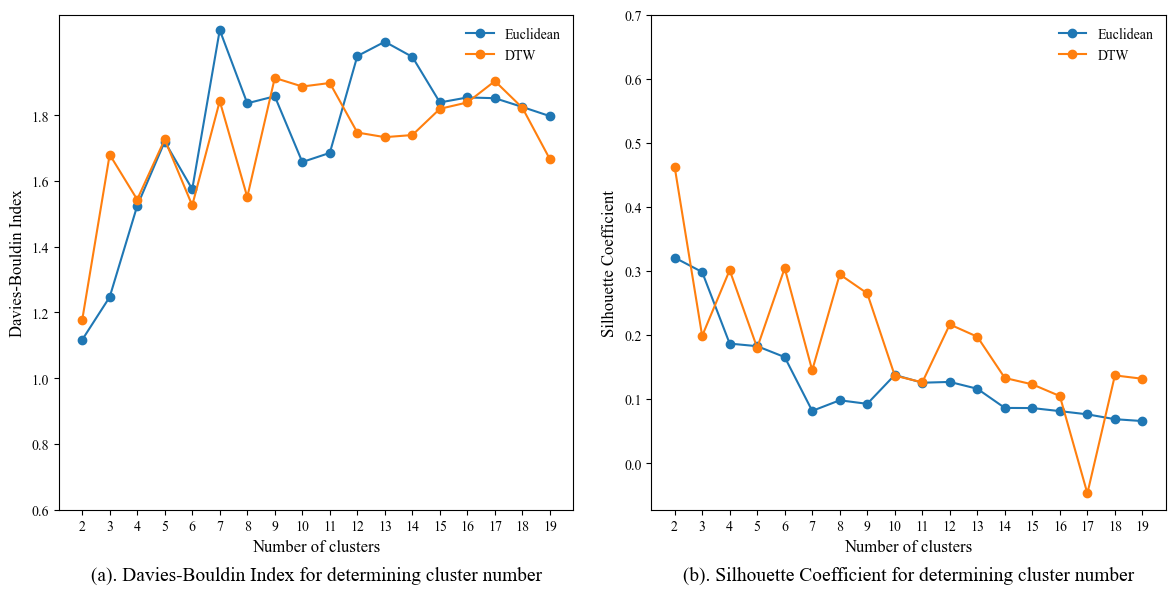

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import davies_bouldin_score, silhouette_score
from tslearn.metrics import cdist_dtw, cdist_soft_dtw_normalized

# 假设 `normalized_data` 是已归一化的数据 (以 pandas DataFrame 形式存在)
# normalized_data: 行表示样本，列表示特征（例如时间序列数据）
data = normalized_data.iloc[:, 1:25]  # 排除第一列（假设是 ID 列）

# 函数计算指标
def evaluate_clustering(data, distance_matrix_func, distance_name, cluster_range):
    db_scores = []
    silhouette_scores = []
    for n_clusters in cluster_range:
        # 计算距离矩阵
        if distance_name == "ED":
            from sklearn.metrics import pairwise_distances
            dist_matrix = pairwise_distances(data, metric="euclidean")
        elif distance_name == "DTW":
            dist_matrix = distance_matrix_func(data)

        # 运行 KMedoids
        km = KMedoids(n_clusters=n_clusters, random_state=0, metric="precomputed")
        labels = km.fit_predict(dist_matrix)

        # Davies-Bouldin 指数
        db_scores.append(davies_bouldin_score(data, labels))

        # Silhouette 系数
        np.fill_diagonal(dist_matrix, 0)  # 确保对角线为 0
        silhouette_scores.append(silhouette_score(dist_matrix, labels, metric="precomputed"))

    return db_scores, silhouette_scores

# 定义簇数量范围
cluster_range = range(2, 20)

# 计算欧氏距离 (ED)
ed_db_scores, ed_silhouette_scores = evaluate_clustering(
    data, None, "ED", cluster_range
)

# 计算动态时间规整距离 (DTW)
dtw_db_scores, dtw_silhouette_scores = evaluate_clustering(
    data, lambda x: cdist_soft_dtw_normalized(x, gamma=0.5), "DTW", cluster_range
)

# 绘制图表
plt.figure(figsize=(12, 6))


# Davies-Bouldin 指数
plt.subplot(1, 2, 1)
plt.plot(cluster_range, ed_db_scores, marker="o", label="Euclidean")
plt.plot(cluster_range, dtw_db_scores, marker="o", label="DTW")
plt.xlabel("Number of clusters", fontsize=12)
plt.ylabel("Davies-Bouldin Index", fontsize=12)
plt.xticks(np.arange(min(cluster_range), max(cluster_range) + 1, 1))  # 设置x轴为整数
plt.yticks(np.arange(0.6, 2, 0.2))  # 设置y轴的网格间隔
plt.legend(frameon=False)  # 移除图例的框线
plt.text(0.5, -0.15, "(a). Davies-Bouldin Index for determining cluster number", transform=plt.gca().transAxes, fontsize=14, ha="center", va="bottom")  # 标题放在下方

# Silhouette 系数
plt.subplot(1, 2, 2)
plt.plot(cluster_range, ed_silhouette_scores, marker="o", label="Euclidean")
plt.plot(cluster_range, dtw_silhouette_scores, marker="o", label="DTW")
plt.xlabel("Number of clusters", fontsize=12)
plt.ylabel("Silhouette Coefficient", fontsize=12)
plt.xticks(np.arange(min(cluster_range), max(cluster_range) + 1, 1))  # 设置x轴为整数
plt.yticks(np.arange(0, 0.8, 0.1))  # 设置y轴的网格间隔
plt.legend(frameon=False)  # 移除图例的框线
plt.text(0.5, -0.15, "(b). Silhouette Coefficient for determining cluster number", transform=plt.gca().transAxes, fontsize=14, ha="center", va="bottom")  # 标题放在下方

plt.tight_layout()
plt.show()